In [88]:
import sample
import matplotlib.pyplot as plt
import math
import numpy as np

In [54]:
vals = sample.get_all_samples(512,10)

In [3]:
def variance_map(x):
    vals = zip(*x)
    for i in range(len(vals)):
        vals[i] = np.std(vals[i])
    return vals

In [4]:
def mult(a):
    return reduce(lambda x,y: x*y, a)

In [5]:
def get_all_others(d, l, b):
    out = []
    for label in d:
        if label == l:
            continue
        out.append(sum([(i-b)**2 for i in d[label][1]]))
    return out

In [6]:
def other_variance(s):
    base = sum(vals['training'][s][1])
    base /= len(vals['training'][s][1])
    others = get_all_others(vals['training'], s, base)
    return others

In [7]:
def plot_var(s):
    others = zip(*other_variance(s))
    for i in range(len(others)):
        others[i] = mult(others[i])
    my_var = variance_map(vals['training'][s][1])
    final = np.vectorize(lambda i: (others[i]))(range(len(my_var)))
    fm = max(final)
    tm = max(vals['test'][s][1][0])
    tn = min(vals['test'][s][1][0])
    plt.plot(final)
    #plt.plot((vals['test'][s][1][0]-tn)*fm/(tm-tn))
    plt.show()

noise:


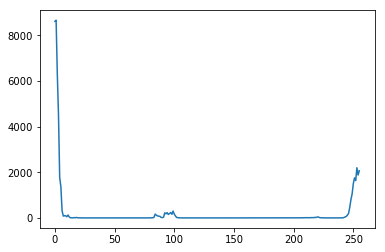

o-cw-left:


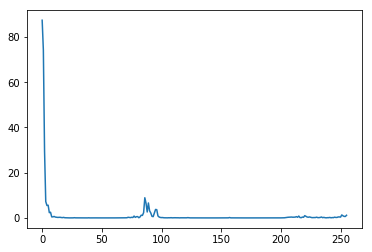

double-tap-left:


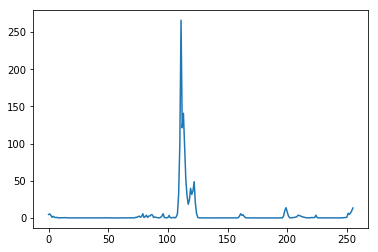

x-left:


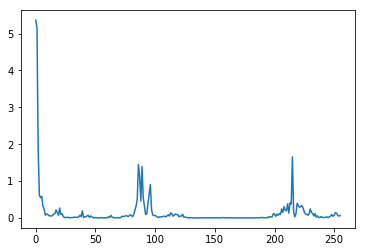

s-left:


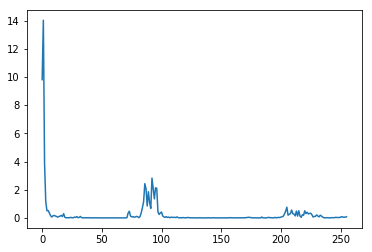

down2-left:


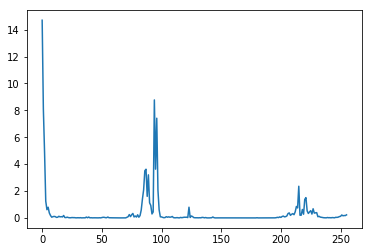

In [8]:
for i in vals['training']:
    print "{}:".format(i)
    plot_var(i)

In [9]:
def proto(x):
    return np.array(map(np.average, zip(*vals['training'][x][1])))

In [10]:
def wtf(i):
    return i
    #return abs(np.fft.fft(i, n=2*n))[n*12/7:]

noise


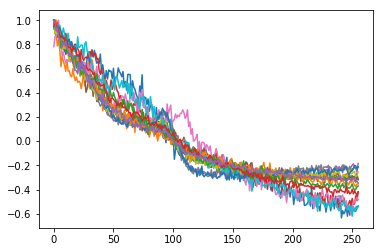

o-cw-left


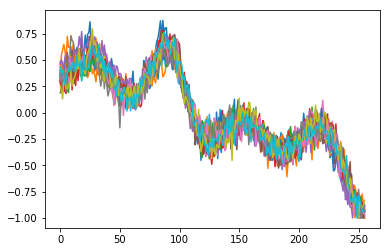

double-tap-left


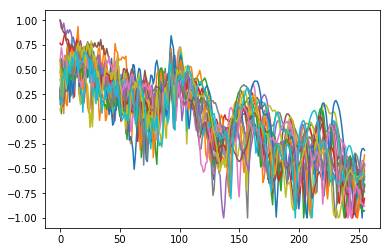

x-left


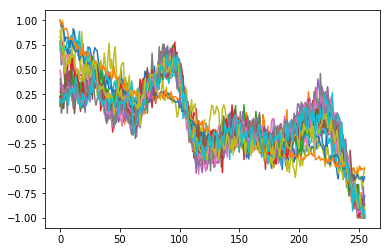

s-left


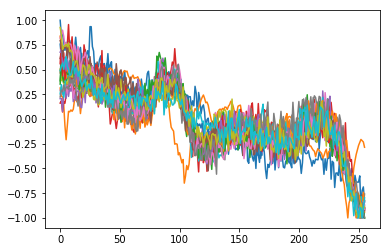

down2-left


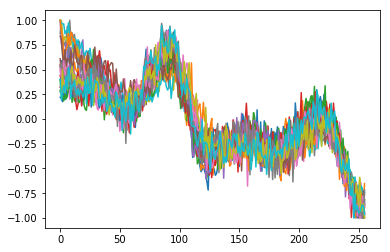

In [11]:
n=len(vals['training']['noise'][1][3])
"""
plt.plot(wtf(proto('o-cw-left')))
plt.plot(wtf(proto('x-left')))
plt.plot(wtf(proto('s-left')))
plt.plot(wtf(proto('down2-left')))
plt.plot(wtf(proto('noise')))
"""
#plt.plot(wtf(vals['training']['noise'][1][3]))
#plt.plot(wtf(vals['test']['x-left'][1][3]))
for l in vals['training']:
    print l
    for i in vals['training'][l][1]:
        plt.plot(i)
    plt.show()

In [12]:
print np.linalg.norm(proto('down2-left')-vals['test']['o-cw-left'][1][0])

2.66963048769


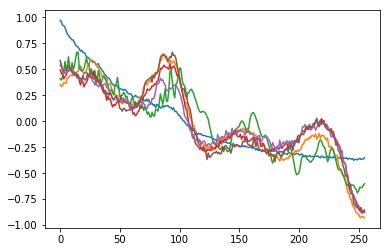

In [13]:
for i in vals['training']:
    plt.plot(proto(i))
plt.show()

In [14]:
s = sample.Sample.from_file("sample/data/x-left/4.wav")

In [109]:
fqs, dft = s.get_frequency_data()
pts = 256

In [132]:
def plot_s(path):
    s = sample.Sample.from_file("sample/data/"+path)
    xcor = (np.fft.ifft(abs(np.array(np.fft.fft(s.data)))**2))
    xcor = abs(xcor[:len(xcor)/2])
    data = np.array_split(xcor, pts)
    data = [np.sum(np.multiply(np.hamming(b.size), b)) for b in data]
    plt.plot(data)

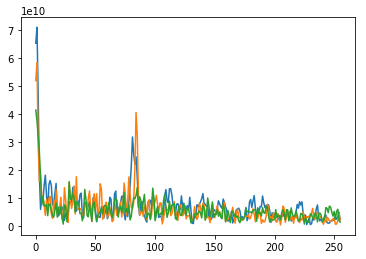

In [133]:
plot_s("x-left/4.wav")
plot_s("x-left/6.wav")
plot_s("x-left/13.wav")
plt.show()

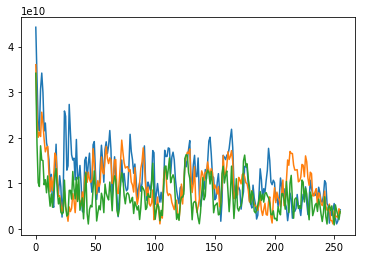

In [134]:
plot_s("o-cw-left/4.wav")
plot_s("o-cw-left/6.wav")
plot_s("o-cw-left/12.wav")
plt.show()

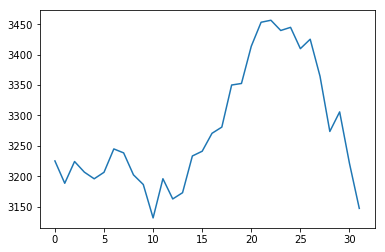

In [75]:
data = np.array_split(dft, pts)
plt.plot([np.sum(np.multiply(np.hamming(b.size), b)) for b in data])
plt.show()

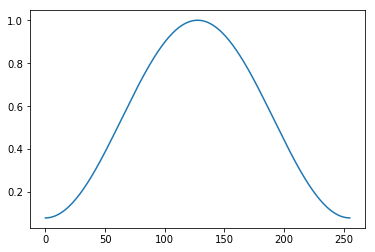

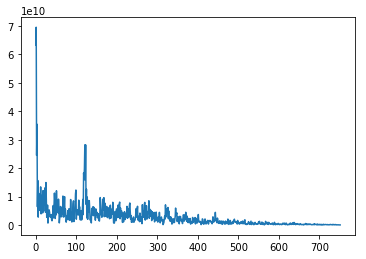